In [91]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


In [57]:
# reading the csv into a df
data = pd.read_csv("biased_leukemia_dataset.csv")
data.head(15)

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,...,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,...,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,...,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,...,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,...,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative
5,6,83,Male,Italy,5676,5.20,291346,12.2,62,No,...,No,No,No,19.1,Yes,No,Ethnic_Group_A,Low,Urban,Negative
6,7,87,Male,Brazil,8858,4.81,134683,11.0,83,No,...,Yes,No,No,31.6,No,No,Ethnic_Group_C,High,Urban,Positive
7,8,75,Female,USA,9633,4.73,246882,13.8,3,No,...,Yes,Yes,No,21.2,No,No,Ethnic_Group_A,Low,Urban,Negative
8,9,75,Male,Norway,7387,5.28,202453,14.5,12,No,...,No,No,No,30.8,No,No,Ethnic_Group_A,Low,Urban,Negative
9,10,88,Female,Sweden,4624,5.90,214921,12.4,65,No,...,Yes,No,No,19.8,No,No,Ethnic_Group_A,Medium,Rural,Negative


In [58]:
data.drop(columns='Patient_ID',inplace=True)

In [59]:
# Viewing the columns in the data
data.columns

Index(['Age', 'Gender', 'Country', 'WBC_Count', 'RBC_Count', 'Platelet_Count',
       'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'Genetic_Mutation',
       'Family_History', 'Smoking_Status', 'Alcohol_Consumption',
       'Radiation_Exposure', 'Infection_History', 'BMI', 'Chronic_Illness',
       'Immune_Disorders', 'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural',
       'Leukemia_Status'],
      dtype='object')

In [60]:
# View the data shape
data.shape

(143194, 21)

In [61]:
# View the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   143194 non-null  int64  
 1   Gender                143194 non-null  object 
 2   Country               143194 non-null  object 
 3   WBC_Count             143194 non-null  int64  
 4   RBC_Count             143194 non-null  float64
 5   Platelet_Count        143194 non-null  int64  
 6   Hemoglobin_Level      143194 non-null  float64
 7   Bone_Marrow_Blasts    143194 non-null  int64  
 8   Genetic_Mutation      143194 non-null  object 
 9   Family_History        143194 non-null  object 
 10  Smoking_Status        143194 non-null  object 
 11  Alcohol_Consumption   143194 non-null  object 
 12  Radiation_Exposure    143194 non-null  object 
 13  Infection_History     143194 non-null  object 
 14  BMI                   143194 non-null  float64
 15  

In [62]:
# The summary statistics of the data
data.describe(include='all')

,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
count,143194.000000,143194,143194,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194,143194,...,143194,143194,143194,143194.000000,143194,143194,143194,143194,143194,143194
unique,NaN,2,22,NaN,NaN,NaN,NaN,NaN,2,2,...,2,2,2,NaN,2,2,3,3,2,2
top,NaN,Male,India,NaN,NaN,NaN,NaN,NaN,No,No,...,No,No,No,NaN,No,No,Ethnic_Group_A,Low,Urban,Negative
freq,NaN,85724,23083,NaN,NaN,NaN,NaN,NaN,114676,100128,...,100293,128766,107335,NaN,93205,121921,71919,71361,100311,121797
mean,44.945200,NaN,NaN,7001.289879,4.998193,249933.012137,13.498334,49.547984,NaN,NaN,...,NaN,NaN,NaN,24.990679,NaN,NaN,NaN,NaN,NaN,NaN
std,25.737805,NaN,NaN,2007.444410,0.500298,49842.308243,1.996714,28.837607,NaN,NaN,...,NaN,NaN,NaN,4.999786,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,-1602.000000,2.940000,46069.000000,4.700000,0.000000,NaN,NaN,...,NaN,NaN,NaN,2.800000,NaN,NaN,NaN,NaN,NaN,NaN
25%,23.000000,NaN,NaN,5644.250000,4.660000,216372.000000,12.100000,25.000000,NaN,NaN,...,NaN,NaN,NaN,21.600000,NaN,NaN,NaN,NaN,NaN,NaN
50%,45.000000,NaN,NaN,7007.000000,5.000000,250248.500000,13.500000,50.000000,NaN,NaN,...,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,8352.000000,5.340000,283603.500000,14.800000,75.000000,NaN,NaN,...,NaN,NaN,NaN,28.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Check for nan values
data.isnull().sum()

Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64

In [64]:
# Check for duplicates
data.duplicated().sum()

0

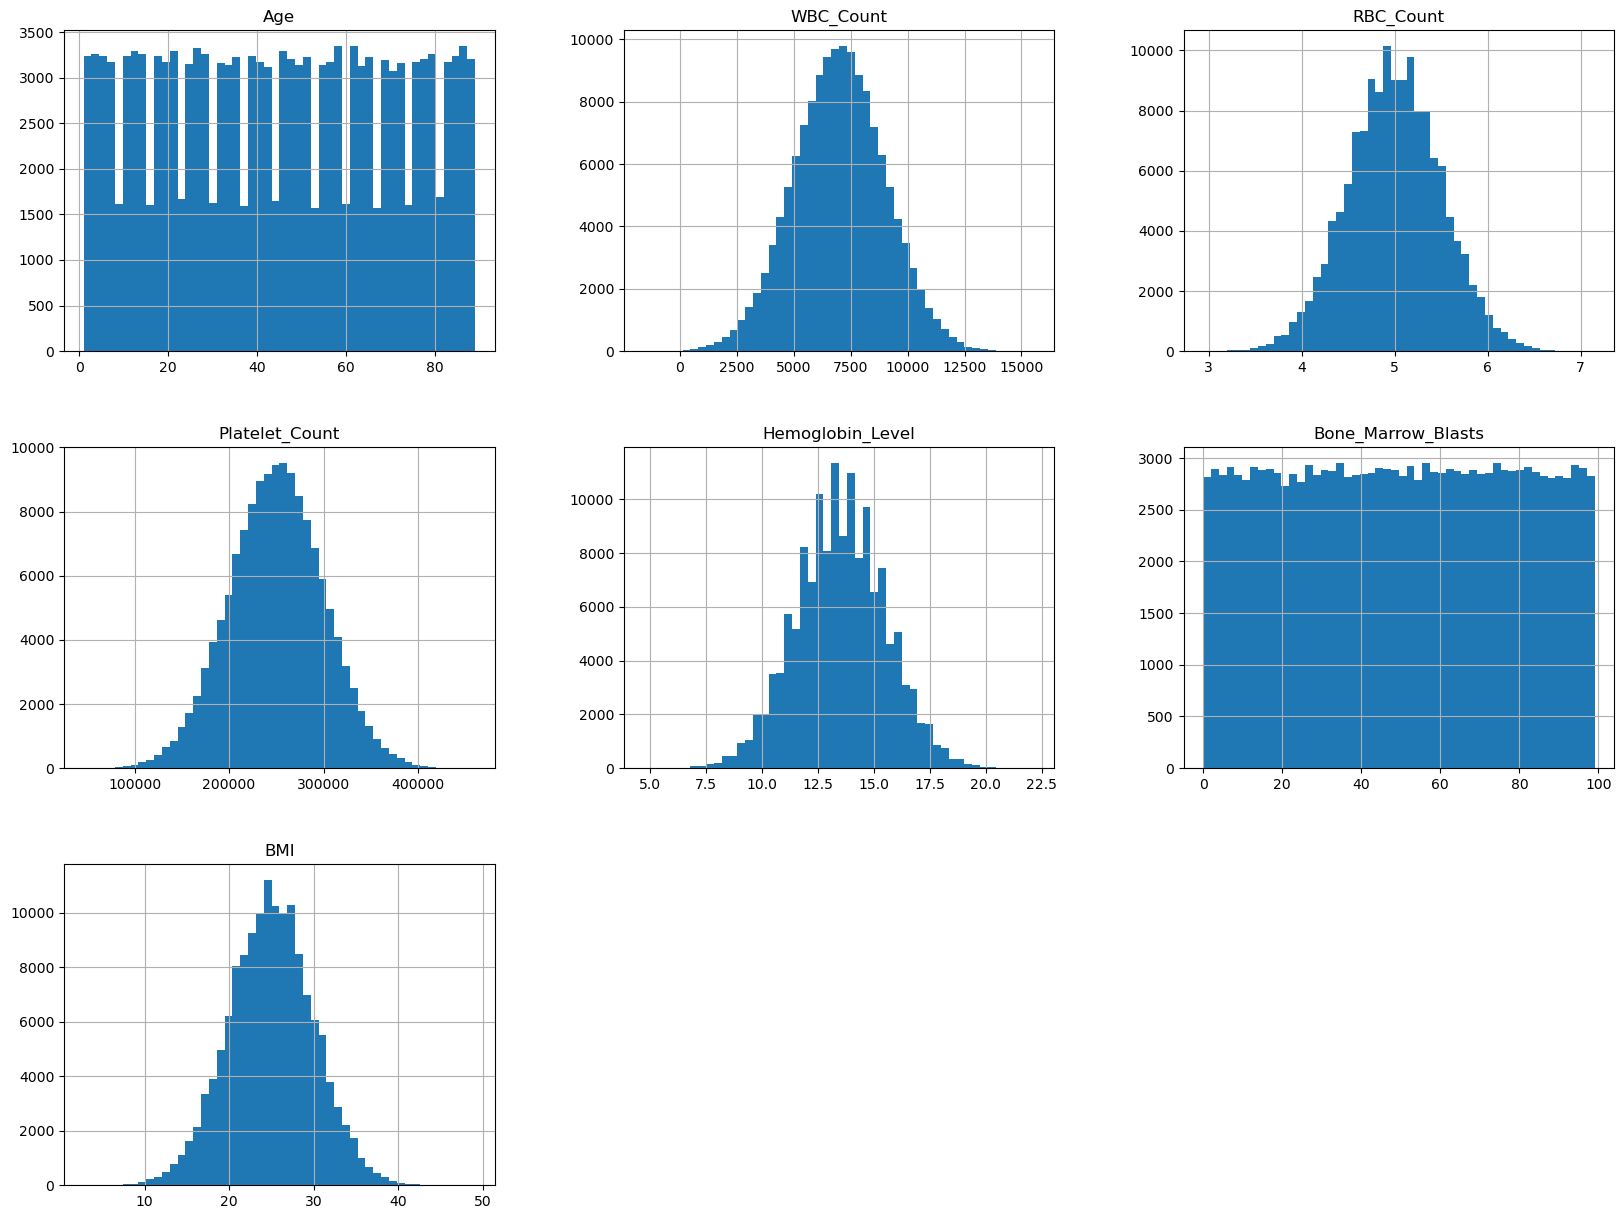

In [65]:
# The data distribution
data.hist(bins=50, figsize=(20,15));

In [66]:
# Unique values for each column 
for c in data.columns:
    print(c, data[c].nunique())

Age 89
Gender 2
Country 22
WBC_Count 11129
RBC_Count 390
Platelet_Count 99585
Hemoglobin_Level 164
Bone_Marrow_Blasts 100
Genetic_Mutation 2
Family_History 2
Smoking_Status 2
Alcohol_Consumption 2
Radiation_Exposure 2
Infection_History 2
BMI 390
Chronic_Illness 2
Immune_Disorders 2
Ethnicity 3
Socioeconomic_Status 3
Urban_Rural 2
Leukemia_Status 2


## Univariate analysis

In [67]:
# Checking the number of unique values in the Age column
data['Age'].nunique()

89

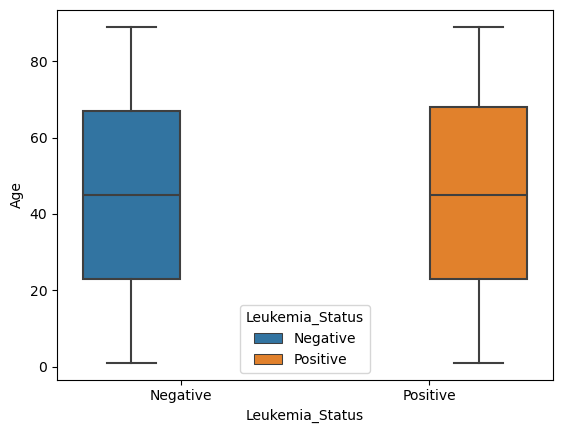

In [68]:
# Age and Luekemia status 
sns.boxplot(y='Age',x='Leukemia_Status',data=data,hue='Leukemia_Status');

<Axes: xlabel='Leukemia_Status'>

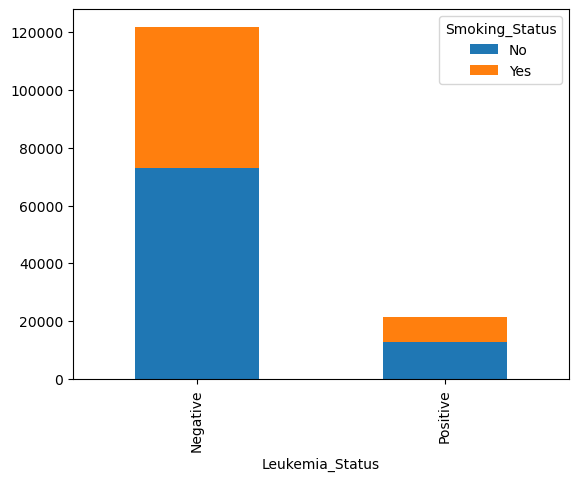

In [69]:
# Crosstab of Leukemia_Status and Smoking Status
ls = pd.crosstab(data['Leukemia_Status'],data['Smoking_Status'])
ls.plot(kind='bar',stacked=True)

In [70]:
data['Smoking_Status'].value_counts()

Smoking_Status
No     85709
Yes    57485
Name: count, dtype: int64

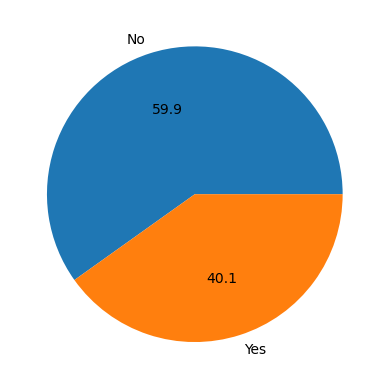

In [71]:
plt.pie(data['Smoking_Status'].value_counts(),explode=(0,0),autopct="%1.1f",labels=("No","Yes"));

In [72]:
le = LabelEncoder()

In [73]:
# Changing object columns to numeric values
for col in data.select_dtypes('object'):
    data[col] = le.fit_transform(data[col])

In [74]:
# Spearman correlation
corr = data.corr(method='spearman')
corr

,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
Age,1.000000,0.001868,-0.000947,0.001936,-0.003267,0.002331,-0.002097,0.004116,-0.000617,-0.000093,...,-0.002492,-0.001876,-0.005421,-0.001393,-0.000598,0.000344,-0.000290,0.002860,-0.004002,0.003188
Gender,0.001868,1.000000,0.000429,-0.001393,-0.000695,-0.003169,-0.003992,-0.002703,0.001481,-0.003067,...,-0.001585,0.002110,0.003544,0.001605,-0.002906,0.005439,0.001350,-0.000025,0.000099,0.000342
Country,-0.000947,0.000429,1.000000,-0.003734,0.002670,-0.004488,-0.003080,-0.006808,0.000318,0.001359,...,-0.002102,-0.002051,0.001965,-0.001683,-0.002684,-0.001286,-0.003081,0.000910,-0.003944,0.000257
WBC_Count,0.001936,-0.001393,-0.003734,1.000000,0.000545,0.002138,-0.000171,-0.004714,0.000998,0.001359,...,0.001662,-0.001485,-0.002545,-0.001341,-0.000786,-0.001805,-0.002078,0.001261,0.001632,-0.000521
RBC_Count,-0.003267,-0.000695,0.002670,0.000545,1.000000,-0.004216,0.001401,-0.002147,0.000880,-0.002741,...,-0.000895,-0.002129,-0.001806,-0.000666,0.004376,-0.002063,0.002607,0.001021,-0.005466,0.000242
Platelet_Count,0.002331,-0.003169,-0.004488,0.002138,-0.004216,1.000000,-0.002884,0.003607,0.002671,0.002520,...,0.005016,-0.001897,-0.000683,-0.000993,0.001403,-0.000411,0.000330,0.001216,0.000141,-0.002166
Hemoglobin_Level,-0.002097,-0.003992,-0.003080,-0.000171,0.001401,-0.002884,1.000000,0.000245,-0.000830,0.002030,...,-0.000374,-0.001834,-0.000081,0.001360,0.002528,-0.000686,-0.001216,0.000659,0.005515,0.004635
Bone_Marrow_Blasts,0.004116,-0.002703,-0.006808,-0.004714,-0.002147,0.003607,0.000245,1.000000,-0.001476,0.001284,...,0.001933,0.000892,-0.002200,0.002019,0.007735,0.000286,-0.001997,-0.007507,-0.000148,0.004515
Genetic_Mutation,-0.000617,0.001481,0.000318,0.000998,0.000880,0.002671,-0.000830,-0.001476,1.000000,0.000043,...,0.000420,-0.002349,-0.000385,0.000342,-0.002994,0.004049,0.002366,-0.000895,0.001581,0.000522
Family_History,-0.000093,-0.003067,0.001359,0.001359,-0.002741,0.002520,0.002030,0.001284,0.000043,1.000000,...,0.001676,0.000543,0.003807,-0.000849,0.005101,-0.000339,0.002763,0.000705,0.002899,0.000632


In [76]:
# Defining the target
target = "Leukemia_Status"
X = data.drop(columns=target)
y = data[target]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [86]:
X_train_tensor.shape, X_test_tensor.shape,y_train_tensor.shape,y_test_tensor.shape

(torch.Size([114555, 20]),
 torch.Size([28639, 20]),
 torch.Size([114555]),
 torch.Size([28639]))

In [87]:
class Leukemia(nn.Module):
    def __init__(self):
        super(Leukemia, self).__init__()
        self.layer1 = nn.Linear(20, 256)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(256, 256)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.layer5 = nn.Linear(64, 32)
        self.relu5 = nn.ReLU()
        self.layer6 = nn.Linear(32, 16)
        self.relu6 = nn.ReLU()
        self.layer7 = nn.Linear(16, 2)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.layer5(x)
        x = self.relu5(x)
        x = self.layer6(x)
        x = self.relu6(x)
        x = self.layer7(x)
        x = self.softmax(x)
        return x

In [88]:
model = Leukemia()

In [90]:
optimizer = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

Test accuracy :0.85, Test Loss : 0.46


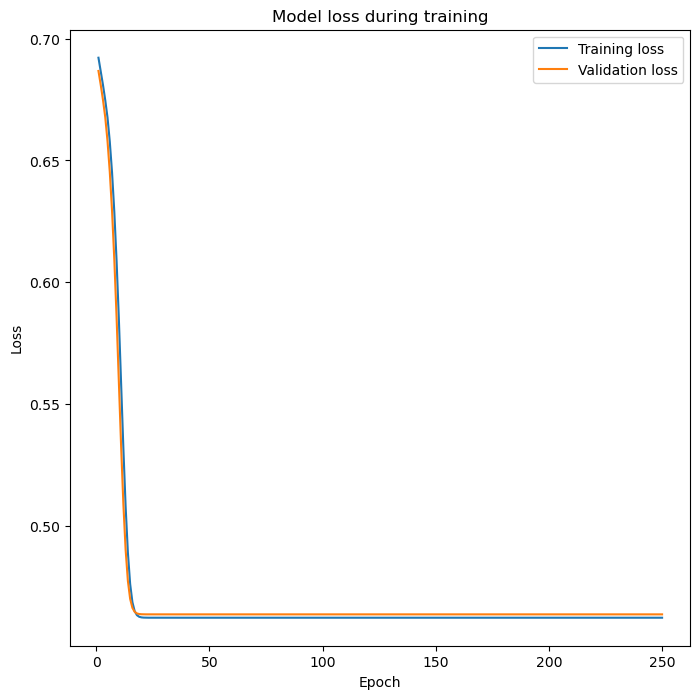

In [92]:
history = {'loss':[],'val_loss':[]}
num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs,y_train_tensor)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())

    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val,y_test_tensor)
        history['val_loss'].append(val_loss.item())
        
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs,y_test_tensor).item()
    _,predicted = torch.max(outputs,1)
    test_accuracy = accuracy_score(y_test_tensor,predicted)
            
print(f"Test accuracy :{test_accuracy:.2f}, Test Loss : {test_loss:.2f}")
        
epochs = range(1,num_epochs+1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8,8)) 
plt.plot(epochs, train_loss, label= 'Training loss')
plt.plot(epochs, val_loss, label= 'Validation loss')
plt.title('Model loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
torch.save(model, 'model.pth')